In [1]:
import numpy as np
import scipy.stats
import la_forge.core as co
import pickle, json, copy, glob
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import kalepy as kale

In [3]:
# ng = co.Core(chaindir='/Users/hazboun/nanograv_detection/12p5yr/std_dmx_gwb_5freqs/noBE/')
# ng.save('./ng_12p5yr_fullpta_M2a.core')

In [4]:
ng = co.Core(corepath='./ng_12p5yr_fullpta_M2a.core')
epta = co.Core(corepath='./epta_dr2_fullpta_M2a.core')
ppta = co.Core(corepath='./ppta_dr2_fullpta_M2a.core')

Loading data from HDF5 file....
Loading data from HDF5 file....
Loading data from HDF5 file....


In [5]:
ng_gwb = ng('gw_log10_A')
epta_gwb = epta('gw_log10_A')
ppta_gwb = ppta('gw_log10_A')

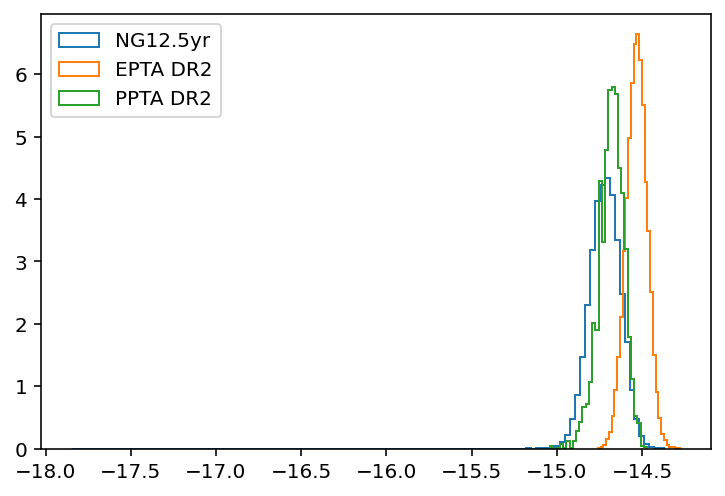

In [6]:
log=False
nbins = 30
plt.hist(ng_gwb,bins=4*nbins,histtype='step',density=True,label='NG12.5yr',log=log)
plt.hist(epta_gwb,bins=nbins,histtype='step',density=True,label='EPTA DR2',log=log)
plt.hist(ppta_gwb,bins=nbins,histtype='step',density=True,label='PPTA DR2',log=log)
plt.legend(loc='upper left')
plt.show()

In [7]:
bin_num = 150
linspace = [-18,-14]
bins = np.linspace(linspace[0],linspace[1],bin_num)
bighist = np.zeros((3,len(bins)))

_, bighist[0,:] = kale.density(ng_gwb, points=bins, reflect=linspace, probability=True)
_, bighist[1,:] = kale.density(epta_gwb, points=bins, reflect=linspace, probability=True)
_, bighist[2,:] = kale.density(ppta_gwb, points=bins, reflect=linspace, probability=True)

fullhist = np.prod(bighist,axis=0)
fullhist = (fullhist[1:]+fullhist[:-1])/2

In [8]:
gwb = scipy.stats.rv_histogram([fullhist,bins])

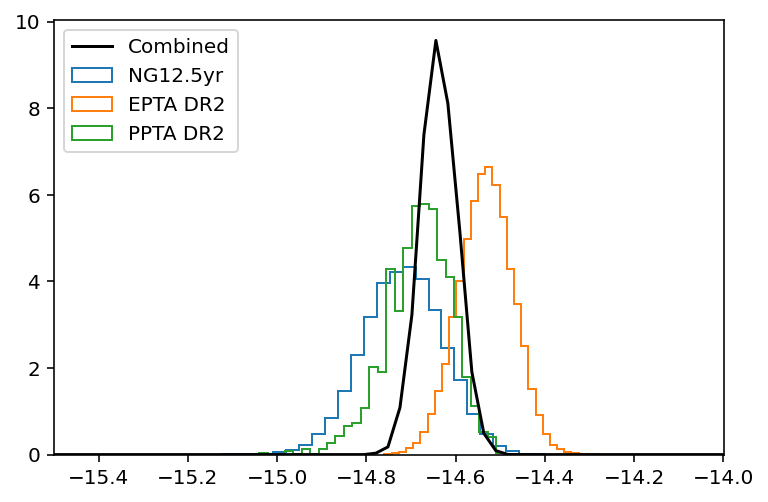

In [9]:

log=False
nbins = 30
plt.hist(ng_gwb,bins=4*nbins,histtype='step',density=True,label='NG12.5yr',log=log)
plt.hist(epta_gwb,bins=nbins,histtype='step',density=True,label='EPTA DR2',log=log)
plt.hist(ppta_gwb,bins=nbins,histtype='step',density=True,label='PPTA DR2',log=log)
plt.plot(bins,gwb.pdf(x=bins),color='k',label='Combined')
plt.legend(loc='upper left')
plt.xlim(-15.5,-14)
plt.show()

In [10]:
samples=gwb.rvs(size=1000)

In [11]:
ng_idxs = []
epta_idxs = []
ppta_idxs = []
for s in samples:
    ng_idxs.append(np.argmin(np.abs(ng.get_param('gw_log10_A',to_burn=False)-s)))
    epta_idxs.append(np.argmin(np.abs(epta.get_param('gw_log10_A',to_burn=False)-s)))
    ppta_idxs.append(np.argmin(np.abs(ppta.get_param('gw_log10_A',to_burn=False)-s)))
    

In [12]:
np.unique(ng_idxs).size,np.unique(epta_idxs).size,np.unique(ppta_idxs).size

(983, 960, 803)

In [13]:
ng.chain.shape

(1146700, 95)

In [14]:
ng_chain = ng.chain[ng_idxs,:]
epta_chain = epta.chain[epta_idxs,:]
ppta_chain = ppta.chain[ppta_idxs,:]
ng_chain.shape,epta_chain.shape,ppta_chain.shape

((1000, 95), (1000, 29), (1000, 177))

In [15]:
np.save('./combined_ng_chain.npy',ng_chain)
np.save('./combined_epta_chain.npy',epta_chain)
np.save('./combined_ppta_chain.npy',ppta_chain)